<a href="https://colab.research.google.com/github/SowmyaDontha88/Machine_Learning/blob/main/SVM_For_Fireforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# **Problem Statement -> Classify the size of forest using SVM**

In [ ]:
data = pd.read_csv('forestfires.csv')

# **EDA**

In [ ]:
data.head(5)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [ ]:
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.isnull().any()

month            False
day              False
FFMC             False
DMC              False
DC               False
ISI              False
temp             False
RH               False
wind             False
rain             False
area             False
dayfri           False
daymon           False
daysat           False
daysun           False
daythu           False
daytue           False
daywed           False
monthapr         False
monthaug         False
monthdec         False
monthfeb         False
monthjan         False
monthjul         False
monthjun         False
monthmar         False
monthmay         False
monthnov         False
monthoct         False
monthsep         False
size_category    False
dtype: bool

In [ ]:
corr = data[data.columns[0:11]].corr()

<Figure size 1080x1080 with 0 Axes>

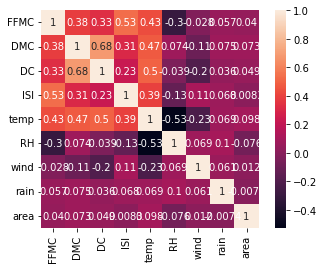

<Figure size 1080x1080 with 0 Axes>

In [ ]:
sns.heatmap(corr,square=True,annot=True)
plt.figure(figsize=(15,15))

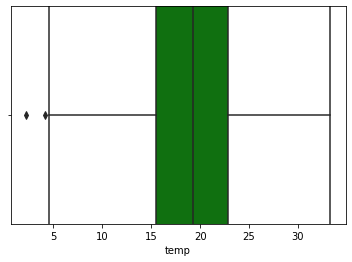

In [ ]:
sns.boxplot(data,x='temp',color='g', palette=None, saturation=0.75, width=10 ,dodge=True, fliersize=5)
plt.show()

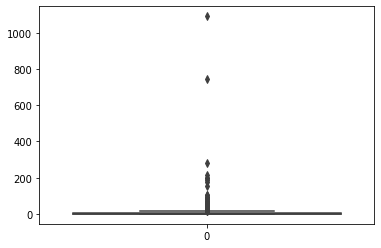

In [ ]:
ax = sns.boxplot(data['area'])

<Axes: xlabel='temp', ylabel='wind'>

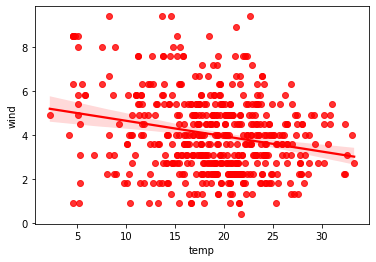

In [ ]:
sns.regplot(data,x='temp',y='wind',color='r')

In [ ]:
plt.rcParams["figure.figsize"] = 9,5

In [ ]:
import warnings
warnings.filterwarnings('ignore')

Skew: 12.846933533934868
Kurtosis: 194.1407210942299


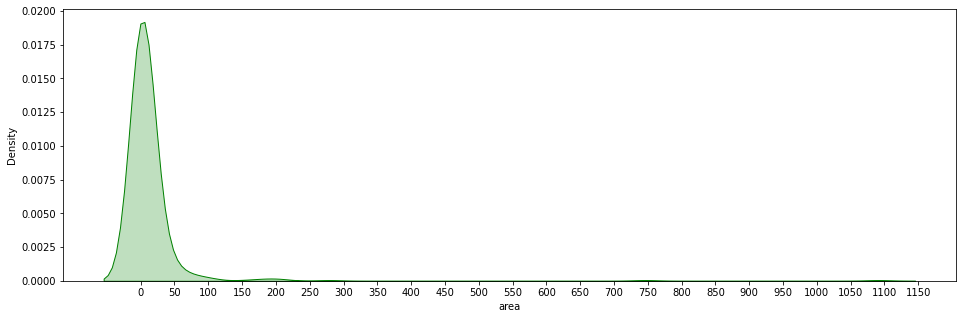

In [ ]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(data['area'].skew()))
print("Kurtosis: {}".format(data['area'].kurtosis()))
ax = sns.kdeplot(data['area'],shade=True,color='g')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

From the above graph we can say that data is left skewed and has high kurtosis value.

In [ ]:
dfa = data[data.columns[0:10]]
month_colum = dfa.select_dtypes(include='object').columns.tolist()

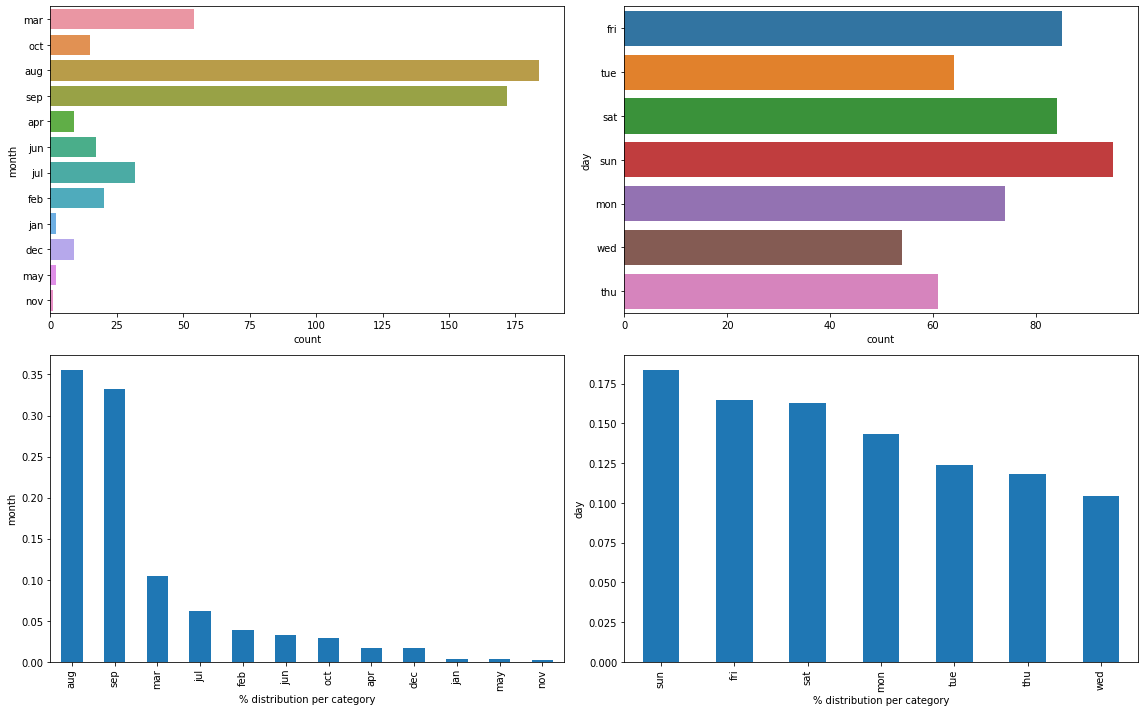

In [ ]:
plt.figure(figsize=(16,10))
for i,col in enumerate(month_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=dfa,y=col)
    plt.subplot(2,2,i+2)
    data[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show() 

Majority of the fire was in the month of august and september , most recorded on sundays ans fridays.

In [ ]:
num_columns = dfa.select_dtypes(exclude='object').columns.tolist()

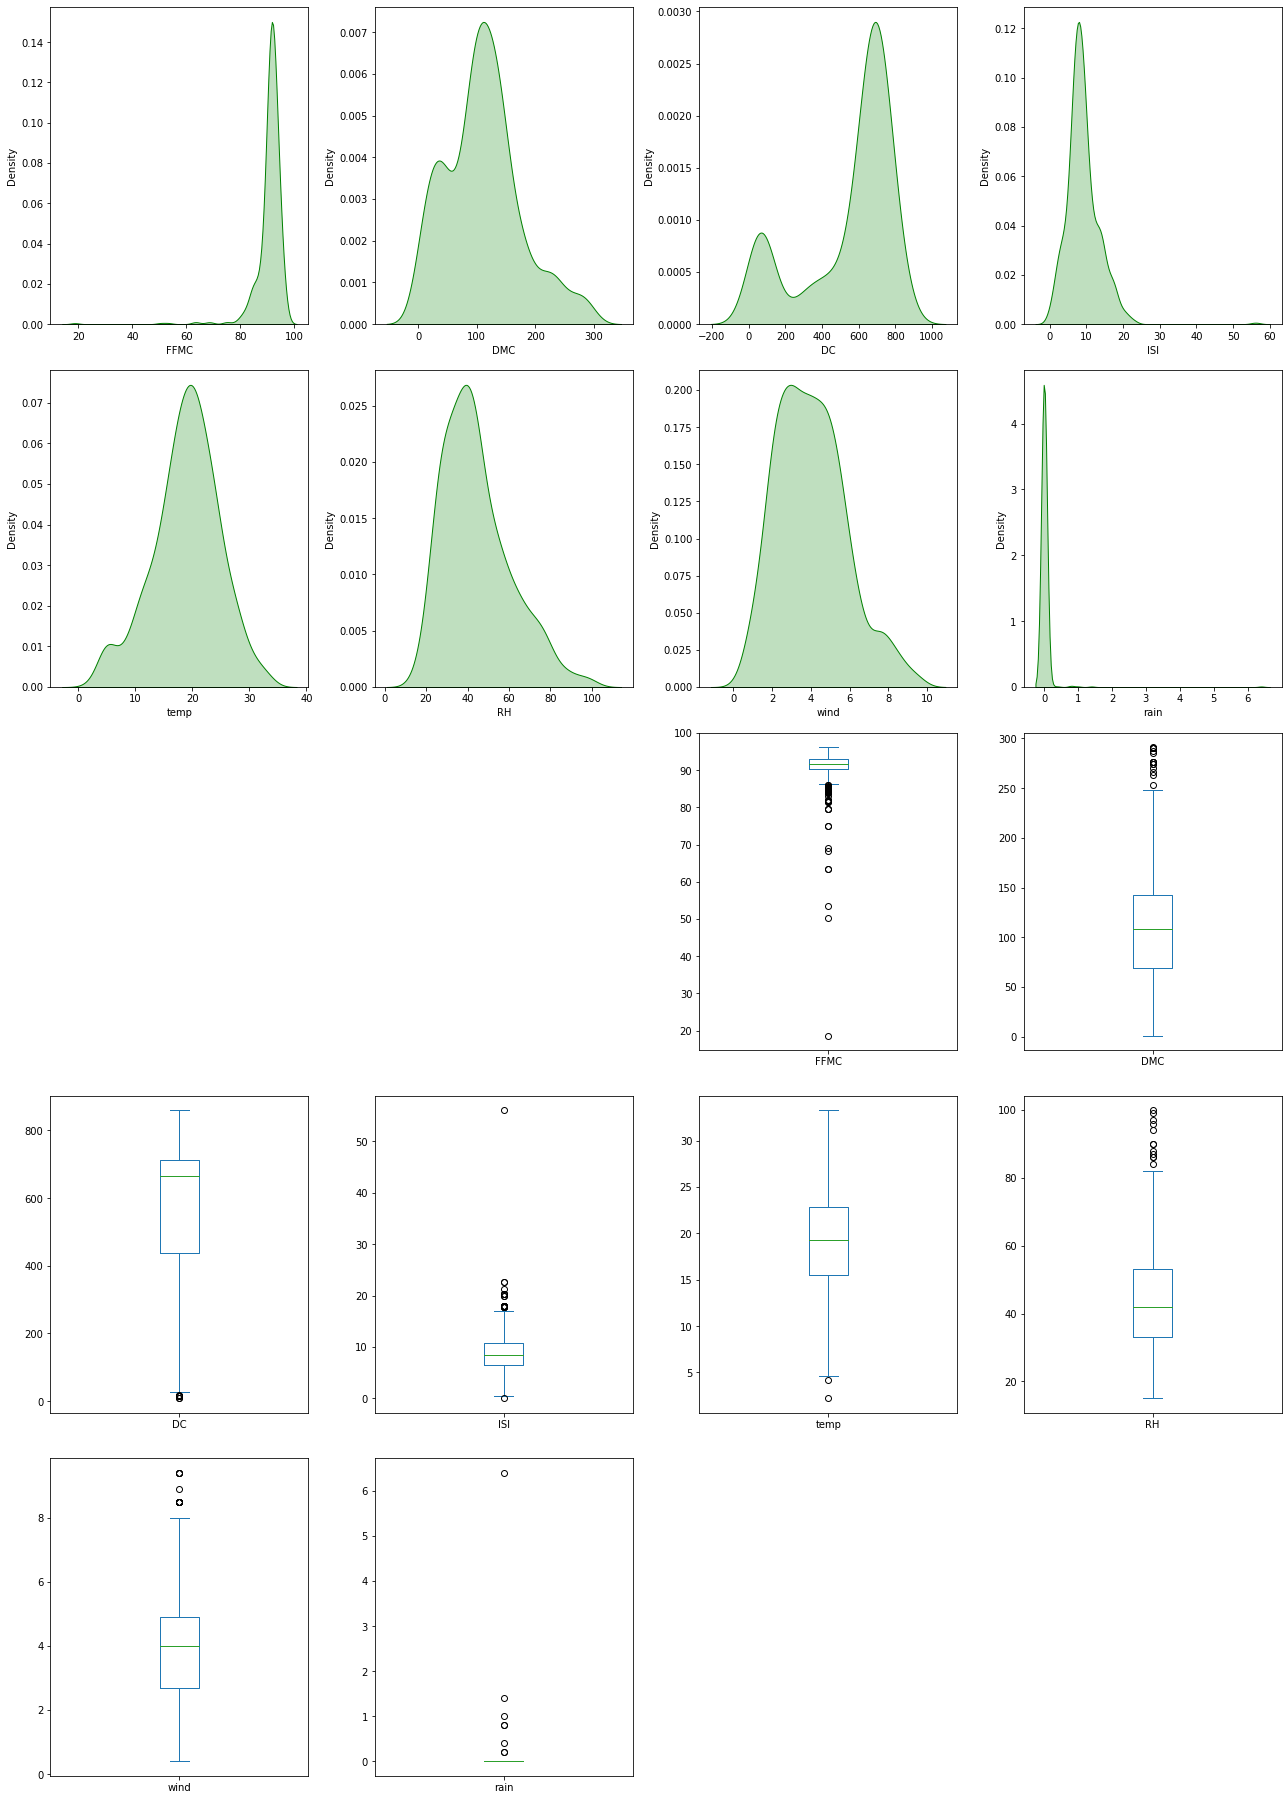

,FFMC,DMC,DC,ISI,temp,RH,wind,rain
skewness,-6.575606,0.547498,-1.100445,2.536325,-0.331172,0.862904,0.571001,19.816344
kurtosis,67.066041,0.204822,-0.245244,21.458037,0.136166,0.438183,0.054324,421.295964


In [ ]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(data[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    data[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = data[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [ ]:
X = data.iloc[:,2:30]
y = data.iloc[:,30]

In [ ]:
mapping = {'small': 1, 'large': 2}

In [ ]:
y = y.replace(mapping)

# **SVM**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3,random_state=42)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((361, 28), (361,), (156, 28), (156,))

In [ ]:
model_linear = SVC(kernel = "linear")
model_linear.fit(X_train,y_train)
pred_test_linear = model_linear.predict(X_test)
print("Accuracy:",accuracy_score(y_test, pred_test_linear))
accuracy_linear=accuracy_score(y_test, pred_test_linear)

Accuracy: 0.9871794871794872


In [ ]:
model_poly = SVC(kernel = "poly")
model_poly.fit(X_train,y_train)
pred_test_poly = model_poly.predict(X_test)
print("Accuracy:",accuracy_score(y_test, pred_test_poly))
accuracy_poly = accuracy_score(y_test, pred_test_poly)

Accuracy: 0.7756410256410257


In [ ]:
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(X_train,y_train)
pred_test_rbf = model_rbf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, pred_test_rbf))
accuracy_rbf = accuracy_score(y_test, pred_test_rbf)

Accuracy: 0.75


In [ ]:
model_sigmoid = SVC(kernel = "sigmoid")
model_sigmoid.fit(X_train,y_train)
pred_test_sigmoid = model_sigmoid.predict(X_test)
print("Accuracy:",accuracy_score(y_test, pred_test_sigmoid))
accuracy_sigmoid = accuracy_score(y_test, pred_test_sigmoid)

Accuracy: 0.7115384615384616


<BarContainer object of 4 artists>

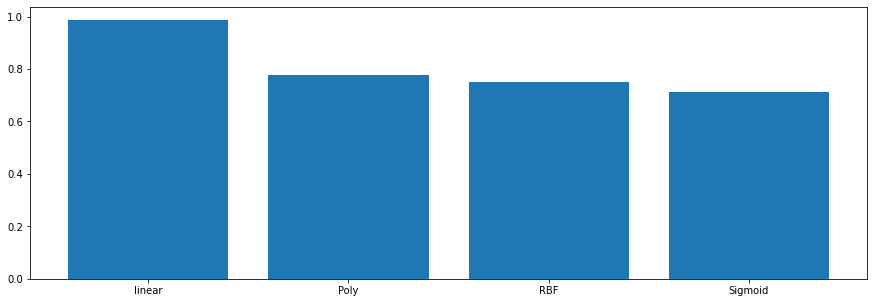

In [ ]:
plt.figure(figsize=(15,5))
fn = [accuracy_linear,accuracy_poly,accuracy_rbf,accuracy_sigmoid]
d = ['linear','Poly','RBF','Sigmoid']
plt.bar(x=d,height=fn)

From the above graph we can say that Linear SVM has highest accuracy in classifying the forest size